## Kümeleme##
ögeleri benzwer özelliklerine göre gruplara ayırma işlemidir.
Denetimsiz / Unsupervised Learning

In [1]:
# kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4821-D018

 Directory of C:\Users\emura\Documents\Techist\ders 11

13.06.2024  20:46    <DIR>          .
13.06.2024  18:57    <DIR>          ..
13.06.2024  20:44    <DIR>          .ipynb_checkpoints
13.06.2024  20:26             1.467 app.py
11.06.2024  20:58           141.824 cars.xls
13.06.2024  20:46               827 Clustering.ipynb
13.06.2024  20:40            22.829 gradio WC.ipynb
13.06.2024  20:27                38 requirements.txt
13.06.2024  20:24            55.894 stylecloud.png
               6 File(s)        222.879 bytes
               3 Dir(s)   7.800.930.304 bytes free


In [4]:
#veri dosyasını yükle
df=pd.read_excel('cars.xls')

In [6]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [8]:
#Modelleme
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
#belirli özelliklere göre kümeler oluşturacağız
X=df[['Price','Mileage','Cylinder']]

In [10]:
X.head(9)

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6
5,15709.052821,22236,6
6,15230.003390,22576,6
7,15048.042184,22964,6
8,14862.093870,24021,6


In [11]:
model=KMeans(n_clusters=4,random_state=42)
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [12]:
predict=model.predict(X)
X['Cluster']=predict
X

C:\Users\emura\AppData\Local\Temp\ipykernel_11020\2226996195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster']=predict


,Price,Mileage,Cylinder,Cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,3
4,16339.170324,19832,6,3
...,...,...,...,...
799,16507.070267,16229,6,3
800,16175.957604,19095,6,3
801,15731.132897,20484,6,3
802,15118.893228,25979,6,1


In [13]:
silhouette_score(X, X['Cluster'])

0.3381980274495343

Silhouette skoru -1 ile 1 arasında bir değer alır. Değer 1'e yaklaştıkça, veri noktaları kendi kümeleriyle çok iyi eşleşirken diğer kümelerden de iyi ayrılmaktadır. Değer 0'a yaklaştıkça, veri noktaları kendi kümeleriyle orta derecede eşleşir ve diğer kümelerden de orta derecede ayrılır

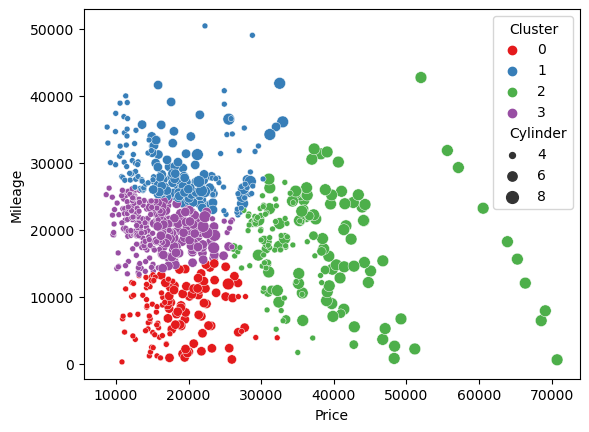

In [15]:
sns.scatterplot(x='Price',y='Mileage',hue='Cluster', size='Cylinder', palette='Set1',data=X)
plt.show()

In [16]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
import yellowbrick

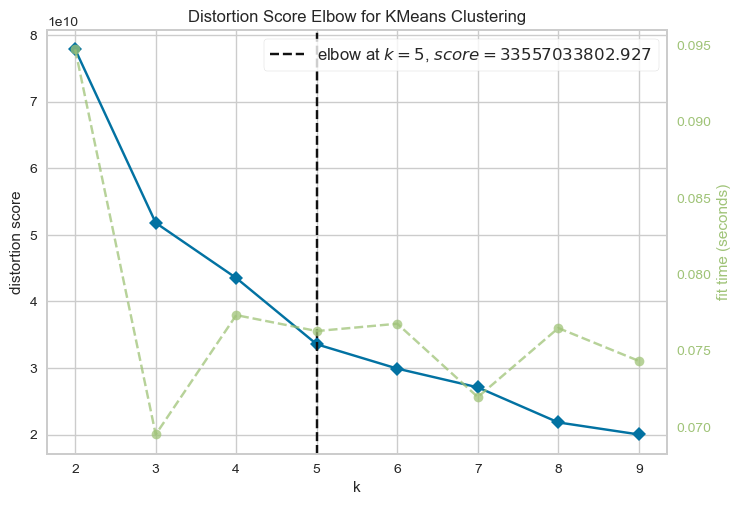

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model=KMeans(random_state=42)
visualizer=KElbowVisualizer(model,k=(2,10),metric='distortion',
                           timing=False)
visualizer.fit(X)
visualizer.show()
